In [56]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.window import Window
import pandas as pd
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
from pyspark.sql.window import Window

In [57]:
print("Basic SQL Operations in Spark SQL\n")

spark = SparkSession.builder.appName('Pertemuan9_SparkSQL').getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')

print("Data awal: ")
df.show()

print("Menampilkan semua data: ")
spark.sql('SELECT * FROM employees').show()

print("Menampilkan data pegawai yang memiliki gaji diatas 3000: ")
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()

print("Menampilkan data rata-rata gaji pegawai: ")
spark.sql('SELECT AVG(Salary) FROM employees').show()

Basic SQL Operations in Spark SQL

Data awal: 
+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

Menampilkan semua data: 
+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

Menampilkan data pegawai yang memiliki gaji diatas 3000: 
+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

Menampilkan data rata-rata gaji pegawai: 
+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



In [58]:
print("Advanced Queries for Data Analysis:\n")

print("Total gaji berdasarkan gender dan usia:")
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

print("Rata-rata gaji karyawan tiap departemen:")
spark.sql('''
SELECT DeptID, AVG(Salary) as AverageSalary
FROM employees
GROUP BY DeptId
ORDER BY AVG(Salary)
''').show()

print("Karyawan dengan gaji di atas rata-rata untuk gender masing-masing:")
spark.sql('''
SELECT e.Name, e.Gender, e.Salary
FROM employees e
JOIN (
    SELECT Gender, AVG(Salary) as AvgGenderSalary
    FROM employees
    GROUP BY Gender
) g ON e.Gender = g.Gender
WHERE e.Salary > g.AvgGenderSalary
''').show()

print("Ranking karyawan berdasarkan gaji dalam departemen:")
spark.sql('''
SELECT Name, DeptId, Salary,
ROW_NUMBER() 
OVER (
      PARTITION BY DeptId 
      ORDER BY Salary DESC
      ) AS Rank
FROM employees
''').show()

Advanced Queries for Data Analysis:

Total gaji berdasarkan gender dan usia:
+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+

Rata-rata gaji karyawan tiap departemen:
+------+-------------+
|DeptID|AverageSalary|
+------+-------------+
|     1|       2850.0|
|     2|       4100.0|
+------+-------------+

Karyawan dengan gaji di atas rata-rata untuk gender masing-masing:
+-----+------+------+
| Name|Gender|Salary|
+-----+------+------+
|James|     M|  3000|
+-----+------+------+

Ranking karyawan berdasarkan gaji dalam departemen:
+-----+------+------+----+
| Name|DeptId|Salary|Rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
| Anna|     2|  4100|   1|
+-----+------+------+----+



In [59]:
print("Window function dan subqueries\n")

print("Top 3 karyawan dalam kelompok usia tertentu:")
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

Window function dan subqueries

Top 3 karyawan dalam kelompok usia tertentu:
+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [60]:
print("Advanced spark SQL queries\n")

spark = SparkSession.builder.appName('Pertemuan9_SparkSQL').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
print("Multiple joins dan subqueries:")
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

print("Rata-rata gaji karyawan tiap departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji:")
spark.sql('''
SELECT e.Name, d.DeptName, e.Salary,
AVG(e.Salary) OVER (PARTITION BY e.DeptId) AS AvgDeptSalary,
RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS Rank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

print("Tren gaji berdasarkan usia tiap departement:")
spark.sql('''
SELECT e.DeptId, e.Age,
AVG(e.Salary) AS AvgSalary
FROM employees e
GROUP BY e.DeptId, e.Age
ORDER BY e.DeptId, e.Age
''').show()

Advanced spark SQL queries

Multiple joins dan subqueries:
+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+

Rata-rata gaji karyawan tiap departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji:
+-----+---------+------+-------------+----+
| Name| DeptName|Salary|AvgDeptSalary|Rank|
+-----+---------+------+-------------+----+
|James|       HR|  3000|       2850.0|   1|
|  Lee|       HR|  2700|       2850.0|   2|
| Anna|Marketing|  4100|       4100.0|   1|
+-----+---------+------+-------------+----+

Tren gaji berdasarkan usia tiap departement:
+------+---+---------+
|DeptId|Age|AvgSalary|
+------+---+---------+
|     1| 23|   2700.0|
|     1| 34|   3000.0|
|     2| 28|   4100.0|
+------+---+---------+



Advanced data analysis & visualisation

Visualisasi tren gaji:


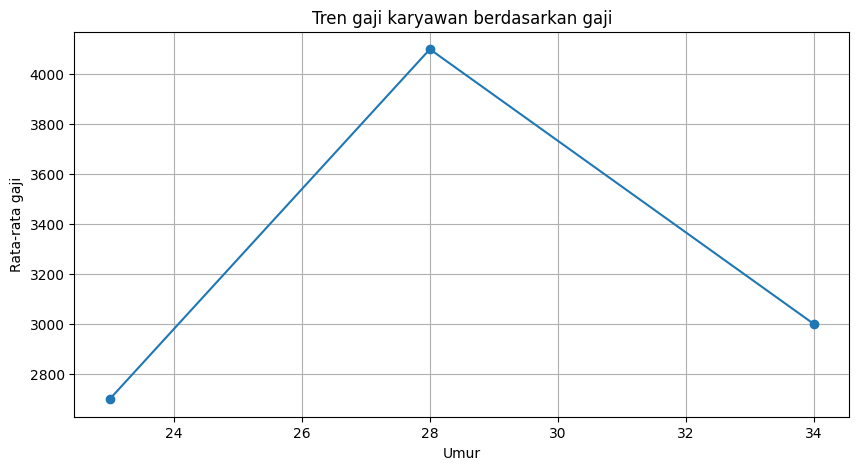

In [61]:
print("Advanced data analysis & visualisation\n")

print("Visualisasi tren gaji:")
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Umur')
plt.ylabel('Rata-rata gaji')
plt.title('Tren gaji karyawan berdasarkan gaji')
plt.grid(True)
plt.show()


Homework

Total gaji dan jumlah karyawan tiap departemen + visualisasi:


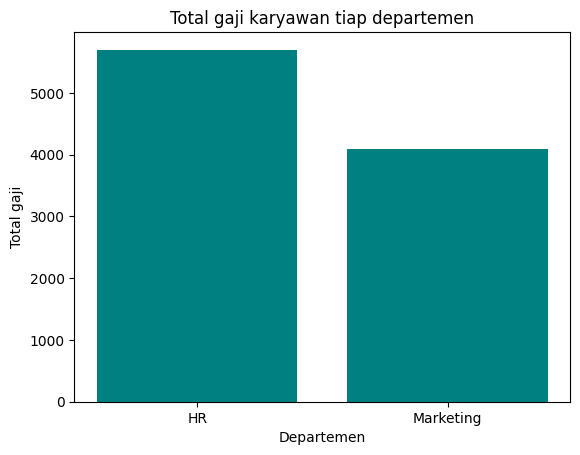


Gaji karyawan di atas rata-rata berdasarkan kelompok usia:


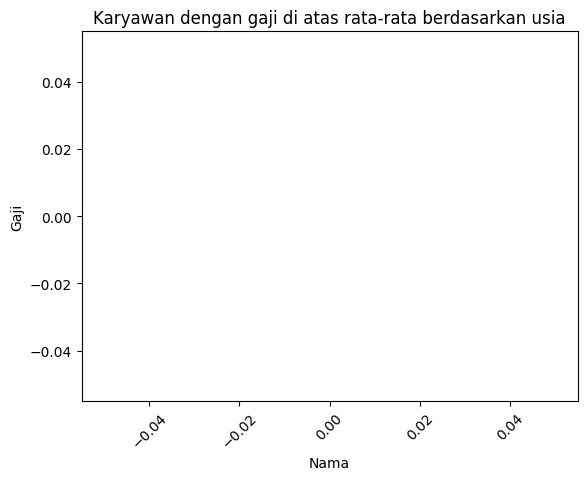


Dataset besar dan analisis

Dataset:
+------+---+------+------+------+
|  Name|Age|Gender|Salary|DeptId|
+------+---+------+------+------+
| Emp_0| 23|     M|  7547|     2|
| Emp_1| 23|     M|  8121|     2|
| Emp_2| 25|     F|  8932|     2|
| Emp_3| 26|     M|  6449|     2|
| Emp_4| 40|     F|  8053|     1|
| Emp_5| 37|     F|  5989|     2|
| Emp_6| 43|     M|  8650|     1|
| Emp_7| 47|     F|  2658|     2|
| Emp_8| 48|     F|  7853|     1|
| Emp_9| 47|     F|  8548|     1|
|Emp_10| 44|     F|  4344|     1|
|Emp_11| 60|     M|  7382|     1|
|Emp_12| 50|     F|  5959|     1|
|Emp_13| 49|     M|  8166|     1|
|Emp_14| 27|     F|  8525|     1|
|Emp_15| 45|     M|  8478|     1|
|Emp_16| 59|     F|  5617|     2|
|Emp_17| 54|     M|  2674|     1|
|Emp_18| 31|     M|  4742|     1|
|Emp_19| 27|     M|  4993|     1|
|Emp_20| 36|     M|  4787|     1|
|Emp_21| 39|     M|  7639|     1|
|Emp_22| 49|     M|  4528|     1|
|Emp_23| 28|     F|  8330|     2|
|Emp_24| 52|     M|  2621|     2|
|Emp_25| 4

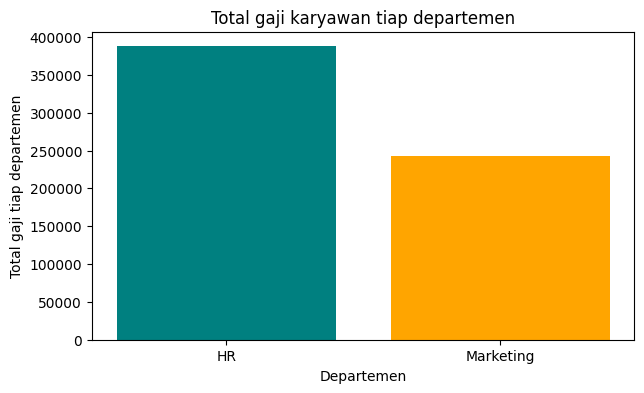


Rata-rata gaji karyawan berdasarkan gender
+------+---------+
|Gender|AvgSalary|
+------+---------+
|     F|  6435.43|
|     M|   6193.8|
+------+---------+



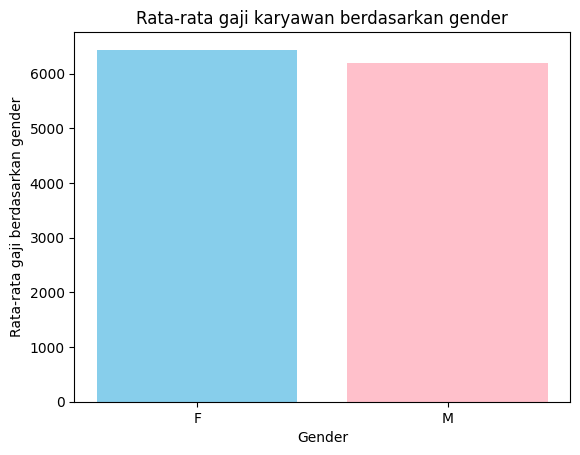


Jumlah karyawan dalam kelompok usia
+--------+--------------+
|AgeGroup|TotalEmployees|
+--------+--------------+
|   20-30|            19|
|   31-40|            26|
|   41-50|            36|
|   51-60|            19|
+--------+--------------+



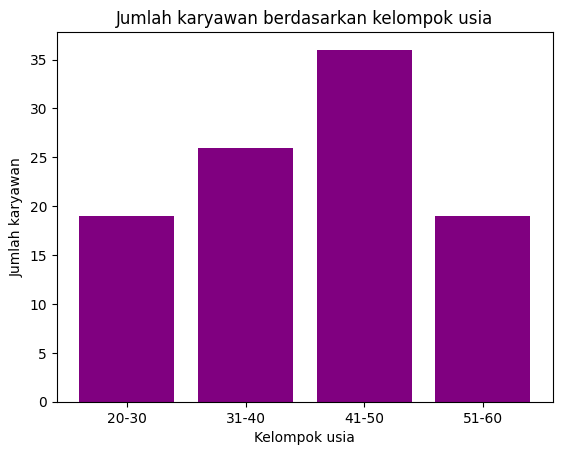


Hubungan departemen dan rata-rata gaji gender
+---------+------+---------+
| DeptName|Gender|AvgSalary|
+---------+------+---------+
|       HR|     F|  6674.96|
|       HR|     M|  6082.88|
|Marketing|     F|  6062.83|
|Marketing|     M|   6368.1|
+---------+------+---------+



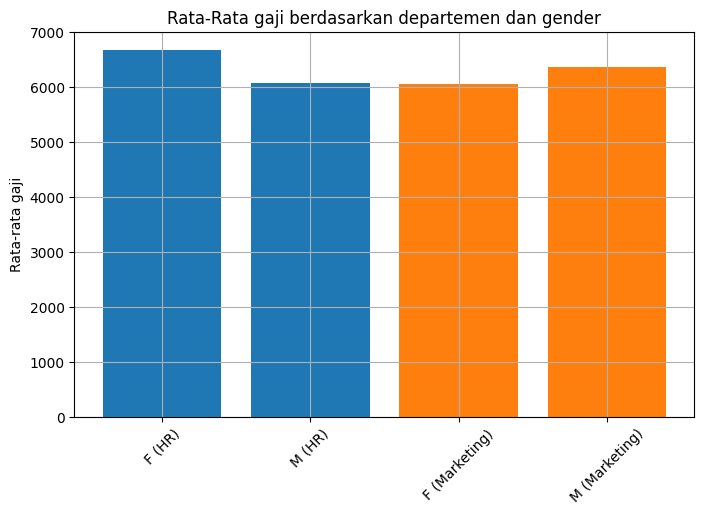


Perbandingan total dan rata-rata gaji kaaryawan tiap departemen
+---------+--------------+---------+-----------+
| DeptName|TotalEmployees|AvgSalary|TotalSalary|
+---------+--------------+---------+-----------+
|       HR|            61|  6354.66|     387634|
|Marketing|            39|  6227.21|     242861|
+---------+--------------+---------+-----------+



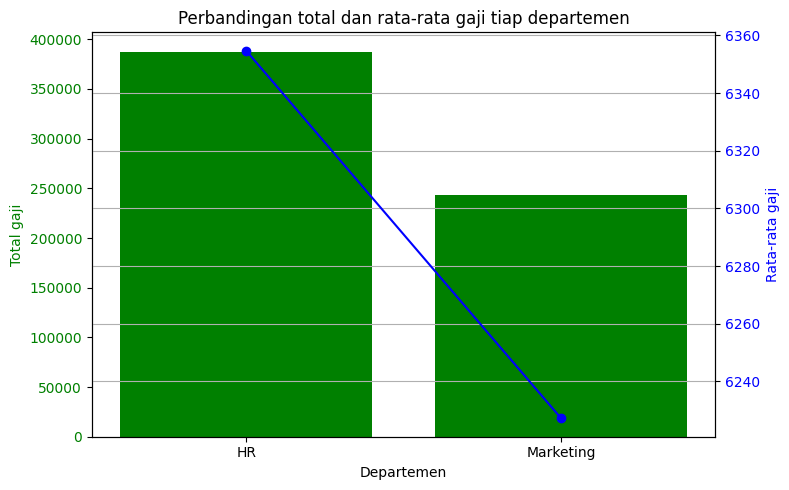

In [62]:
print("Homework\n")

print("Total gaji dan jumlah karyawan tiap departemen + visualisasi:")
dept_summary = spark.sql('''
SELECT d.DeptName, SUM(e.Salary) AS TotalSalary, COUNT(*) AS TotalEmployees
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY TotalSalary DESC
''').toPandas()

plt.bar(dept_summary['DeptName'], dept_summary['TotalSalary'], color='teal')
plt.title('Total gaji karyawan tiap departemen')
plt.xlabel('Departemen')
plt.ylabel('Total gaji')
plt.show()

print("\nGaji karyawan di atas rata-rata berdasarkan kelompok usia:")
above_avg = spark.sql('''
SELECT e.Name, e.Age, e.Salary
FROM employees e
JOIN (
  SELECT Age, AVG(Salary) AS AvgAgeSalary
  FROM employees
  GROUP BY Age
) a ON e.Age = a.Age
WHERE e.Salary > a.AvgAgeSalary
''').toPandas()

plt.bar(above_avg['Name'], above_avg['Salary'], color='orange')
plt.title('Karyawan dengan gaji di atas rata-rata berdasarkan usia')
plt.xlabel('Nama')
plt.ylabel('Gaji')
plt.xticks(rotation=45)
plt.show()

print("\nDataset besar dan analisis\n")

data_big = []
for i in range(100):
    name = f'Emp_{i}'
    age = random.randint(22, 60)
    gender = random.choice(['M', 'F'])
    salary = random.randint(2500, 10000)
    dept = random.choice([1, 2])
    data_big.append((name, age, gender, salary, dept))

big_df = spark.createDataFrame(data_big, schema=['Name','Age','Gender','Salary','DeptId'])
big_df.createOrReplaceTempView('employees_big')

departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
departments.createOrReplaceTempView('departments')

print("Dataset:")
big_df.show(100)

# Sum
total_salary_df = spark.sql('''
SELECT d.DeptName, SUM(e.Salary) AS TotalSalary
FROM employees_big e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY TotalSalary DESC
''')

print("\nTotal gaji karyawan tiap departemen")
total_salary_df.show()

# Visualisasi hasil
pdf = total_salary_df.toPandas()
plt.figure(figsize=(7,4))
plt.bar(pdf['DeptName'], pdf['TotalSalary'], color=['teal','orange'])
plt.title('Total gaji karyawan tiap departemen')
plt.xlabel('Departemen')
plt.ylabel('Total gaji tiap departemen')
plt.grid(False)
plt.show()

# Avg
avg_salary_df = spark.sql('''
SELECT Gender, ROUND(AVG(Salary),2) AS AvgSalary
FROM employees_big
GROUP BY Gender
ORDER BY AvgSalary DESC
''')

print("\nRata-rata gaji karyawan berdasarkan gender")
avg_salary_df.show()

# Visualisasi
pdf_avg = avg_salary_df.toPandas()
plt.bar(pdf_avg['Gender'], pdf_avg['AvgSalary'], color=['skyblue','pink'])
plt.title('Rata-rata gaji karyawan berdasarkan gender')
plt.xlabel('Gender')
plt.ylabel('Rata-rata gaji berdasarkan gender')
plt.show()

# Count
count_age_df = spark.sql('''
SELECT CASE
         WHEN Age BETWEEN 20 AND 30 THEN '20-30'
         WHEN Age BETWEEN 31 AND 40 THEN '31-40'
         WHEN Age BETWEEN 41 AND 50 THEN '41-50'
         ELSE '51-60'
       END AS AgeGroup,
       COUNT(*) AS TotalEmployees
FROM employees_big
GROUP BY CASE
         WHEN Age BETWEEN 20 AND 30 THEN '20-30'
         WHEN Age BETWEEN 31 AND 40 THEN '31-40'
         WHEN Age BETWEEN 41 AND 50 THEN '41-50'
         ELSE '51-60'
       END
ORDER BY AgeGroup
''')

print("\nJumlah karyawan dalam kelompok usia")
count_age_df.show()

# Visualisasi
pdf_count = count_age_df.toPandas()
plt.bar(pdf_count['AgeGroup'], pdf_count['TotalEmployees'], color='purple')
plt.title('Jumlah karyawan berdasarkan kelompok usia')
plt.xlabel('Kelompok usia')
plt.ylabel('Jumlah karyawan')
plt.show()

# Join
join_analysis_df = spark.sql('''
SELECT d.DeptName, e.Gender, ROUND(AVG(e.Salary),2) AS AvgSalary
FROM employees_big e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName, e.Gender
ORDER BY d.DeptName, e.Gender
''')

print("\nHubungan departemen dan rata-rata gaji gender")
join_analysis_df.show()

# Visualisasi
pdf_join = join_analysis_df.toPandas()
fig, ax = plt.subplots(figsize=(8,5))
for dept in pdf_join['DeptName'].unique():
    subset = pdf_join[pdf_join['DeptName'] == dept]
    ax.bar(subset['Gender'] + ' (' + dept + ')', subset['AvgSalary'])
plt.title('Rata-Rata gaji berdasarkan departemen dan gender')
plt.ylabel('Rata-rata gaji')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Gabungan
combined_df = spark.sql('''
SELECT d.DeptName,
       COUNT(*) AS TotalEmployees,
       ROUND(AVG(e.Salary),2) AS AvgSalary,
       SUM(e.Salary) AS TotalSalary
FROM employees_big e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''')

print("\nPerbandingan total dan rata-rata gaji kaaryawan tiap departemen")
combined_df.show()

# Visualisasi gabungan (2 sumbu)
pdf_combined = combined_df.toPandas()
fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(pdf_combined['DeptName'], pdf_combined['TotalSalary'], color='green', label='Total Salary')
ax1.set_xlabel('Departemen')
ax1.set_ylabel('Total gaji', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.plot(pdf_combined['DeptName'], pdf_combined['AvgSalary'], color='blue', marker='o', label='Avg Salary')
ax2.set_ylabel('Rata-rata gaji', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Perbandingan total dan rata-rata gaji tiap departemen')
fig.tight_layout()
plt.grid(True)
plt.show()